In [2]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Reading red wine quality data set
file_path = "winequality-red-folds.csv"  
data = pd.read_csv(file_path)

In [4]:
# Separate features and target variables
X = data.drop(columns=['quality'])  # 特征
y = data['quality']  # 目标变量

In [5]:
# Select the 10 best features using the SelectKBest method
k_best_selector = SelectKBest(k=10)
X_k_best = k_best_selector.fit_transform(X, y)

In [6]:
# Feature selection using methods based on mutual information
mutual_info_selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_mutual_info = mutual_info_selector.fit_transform(X, y)

In [7]:
# Get the selected feature column name
selected_features_k_best = X.columns[k_best_selector.get_support()]
selected_features_mutual_info = X.columns[mutual_info_selector.get_support()]

In [8]:
print("Feature column name selected by SelectKBest method：", selected_features_k_best)
print("Feature column names selected by mutual information method：", selected_features_mutual_info)

Feature column name selected by SelectKBest method： Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')
Feature column names selected by mutual information method： Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol', 'kfold'],
      dtype='object')


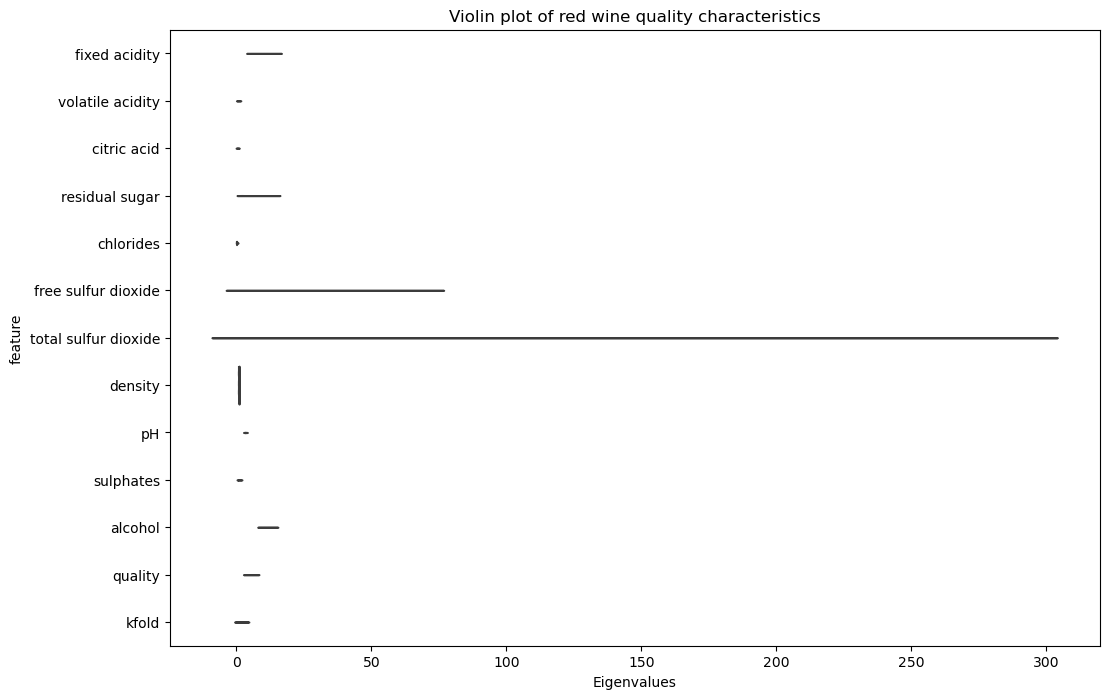

In [9]:
# violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=data, orient='h', palette='muted', inner='quartile')
plt.title('Violin plot of red wine quality characteristics')
plt.xlabel('Eigenvalues')
plt.ylabel('feature')
plt.show()